# Classificação de imagem com rede neural artificial

In [1]:
import cv2
import numpy as np
import os 
import tensorflow as tf # Deep Learning
import pandas as pd # Manipulação de dados
import seaborn as sns # Visualização de dados
import matplotlib.pyplot as plt # Visualização de dados
import PIL # Manipulação de imagens
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import save_model
tf.__version__

'2.12.0'

- Definindo caminho das imagens na variável arquivos

In [2]:
diretorio = "./data/homer_bart_1"
arquivos = [os.path.join(diretorio, arquivo) for arquivo in sorted(os.listdir(diretorio))]

In [3]:
arquivos

['./data/homer_bart_1\\.DS_Store',
 './data/homer_bart_1\\bart1.bmp',
 './data/homer_bart_1\\bart10.bmp',
 './data/homer_bart_1\\bart100.bmp',
 './data/homer_bart_1\\bart101.bmp',
 './data/homer_bart_1\\bart102.bmp',
 './data/homer_bart_1\\bart103.bmp',
 './data/homer_bart_1\\bart104.bmp',
 './data/homer_bart_1\\bart105.bmp',
 './data/homer_bart_1\\bart106.bmp',
 './data/homer_bart_1\\bart108.bmp',
 './data/homer_bart_1\\bart109.bmp',
 './data/homer_bart_1\\bart11.bmp',
 './data/homer_bart_1\\bart110.bmp',
 './data/homer_bart_1\\bart111.bmp',
 './data/homer_bart_1\\bart112.bmp',
 './data/homer_bart_1\\bart113.bmp',
 './data/homer_bart_1\\bart114.bmp',
 './data/homer_bart_1\\bart115.bmp',
 './data/homer_bart_1\\bart116.bmp',
 './data/homer_bart_1\\bart117.bmp',
 './data/homer_bart_1\\bart118.bmp',
 './data/homer_bart_1\\bart119.bmp',
 './data/homer_bart_1\\bart12.bmp',
 './data/homer_bart_1\\bart120.bmp',
 './data/homer_bart_1\\bart121.bmp',
 './data/homer_bart_1\\bart122.bmp',
 './data

- Precisamos definir o tamanho das imagens único para todas 128x128

In [4]:
largura, altura = 128, 128

- Variável imagens para armazenar as imagens em formato de array
- Variável classes para armazenar as classes das imagens 0 -> Homer, 1 -> Bart

In [5]:
imagens = []
classes = []

- Extração dos pixels das imagens

- Nesse bloco de código, estamos lendo as imagens, ajustando o seu tamanho, convertendo para escala de cinza, convertendo para array e adicionando na variável imagens.
- No finalzinho estamos pegando o nome referente a identificação da imagem e adicionando na variável classes para identificar a classe da imagem.

In [6]:
for arquivo in arquivos:
    try:
        imagem = cv2.imread(arquivo)
        (H, W) = imagem.shape[:2] # Altura e largura da imagem
    except:
        continue
    imagem = cv2.resize(imagem, (largura, altura)) # Redimensiona a imagem
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # Converte a imagem para tons de cinza
    imagem = imagem.ravel() # Converte a imagem para um vetor
    imagens.append(imagem) # Adiciona a imagem na lista de imagens
    nome_imagem = arquivo.split(os.path.sep)[-1] # Pega o nome da imagem
    if "homer" in nome_imagem:
        classes.append(0)
    else:
        classes.append(1)            

- Convertendo as imagens em array e suas respectivas classes em array numpy

In [7]:
X = np.array(imagens)
y = np.array(classes)

In [8]:
X.shape, y.shape

((269, 16384), (269,))

- Plot da quantidade de imagens por classe

<Axes: ylabel='count'>

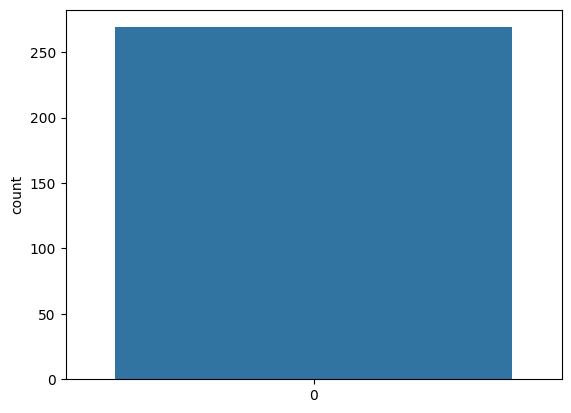

In [10]:
sns.countplot(y)

- Normalização dos dados

In [9]:
X[0].max(), X[0].min()

(255, 0)

- Pegamos os 256 pixes e fizemos a normalização entre 0 e 1 onde 1 é a cor branca e 0 é a cor preta

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

- Base de treinamento e teste
- A biblioteca sklearn possui uma função chamada train_test_split que faz a divisão da base de dados em treinamento e teste
- test_size = 0.25 -> 25% da base de dados será usada para teste e 75% para treinamento
- random_state = 1 -> Para que a divisão seja sempre a mesma

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215, 16384), (54, 16384), (215,), (54,))

## Construção e treinamento da rede neural

- units parâmetro de entrada de neurônios da camada oculta
- activation função de ativação da camada oculta
- input_shape parâmetro de entrada de neurônios da camada de entrada

In [14]:
network1 = tf.keras.models.Sequential() # Cria a rede neural sequencial 
network1.add(tf.keras.layers.Dense(units=8193, activation='relu', input_shape=(X_train.shape[1],))) # Adiciona a primeira camada oculta
network1.add(tf.keras.layers.Dense(units=8193, activation='relu')) # Adiciona a segunda camada oculta
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Adiciona a camada de saída

In [15]:
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


- optimizer parametro de otimização dos pesos da rede neural (adam)
- loss função para calcular o erro (binary_crossentropy)
- metrics métrica para avaliar o modelo (accuracy)

In [16]:
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compila a rede neural

- epochs quantidade de vezes que o modelo será treinado

In [17]:
historico = network1.fit(X_train, y_train, epochs=10) # Treina a rede neural

Epoch 1/10
7/7 [==============================] - 81s 8s/step - loss: 161.1979 - accuracy: 0.4837
Epoch 2/10
7/7 [==============================] - 39s 5s/step - loss: 9.2883 - accuracy: 0.4744
Epoch 3/10
7/7 [==============================] - 37s 5s/step - loss: 1.6882 - accuracy: 0.4977
Epoch 4/10
7/7 [==============================] - 36s 5s/step - loss: 0.9532 - accuracy: 0.5953
Epoch 5/10
7/7 [==============================] - 39s 5s/step - loss: 0.8787 - accuracy: 0.5628
Epoch 6/10
7/7 [==============================] - 36s 5s/step - loss: 1.2543 - accuracy: 0.5256
Epoch 7/10
7/7 [==============================] - 35s 5s/step - loss: 0.9997 - accuracy: 0.5581
Epoch 8/10
7/7 [==============================] - 36s 5s/step - loss: 0.8772 - accuracy: 0.5814
Epoch 9/10
7/7 [==============================] - 37s 5s/step - loss: 0.5918 - accuracy: 0.6884
Epoch 10/10
7/7 [==============================] - 39s 6s/step - loss: 0.7250 - accuracy: 0.6651


- Avaliação da rede neural

In [18]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

- Plot dos valores de erro

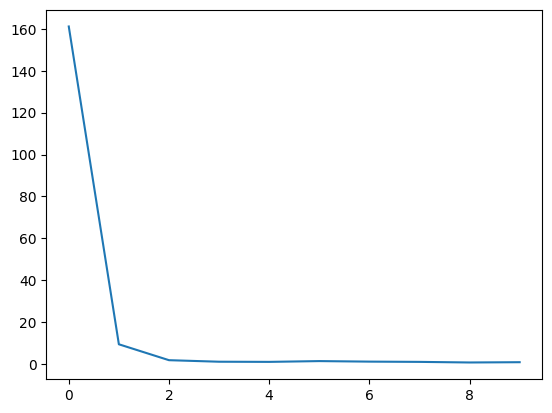

In [19]:
plt.plot(historico.history['loss']);

- Plot da acurácia que é a porcentagem de acerto

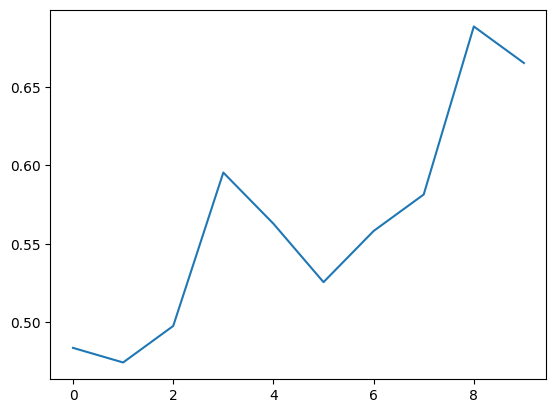

In [20]:
plt.plot(historico.history['accuracy']);

In [21]:
X_test.shape

(54, 16384)

- o predict faz a previsão da imagem de teste

In [22]:
previsao = network1.predict(X_test)
previsao

2/2 [==============================] - 3s 1s/step


array([[0.9487884 ],
       [0.83714557],
       [0.9621378 ],
       [0.9644786 ],
       [0.88756645],
       [0.9588073 ],
       [0.8412697 ],
       [0.9069202 ],
       [0.82749873],
       [0.9000277 ],
       [0.9581182 ],
       [0.6125714 ],
       [0.92326796],
       [0.96924907],
       [0.9552234 ],
       [0.9755036 ],
       [0.9783306 ],
       [0.9231513 ],
       [0.96744233],
       [0.9398503 ],
       [0.93474203],
       [0.92793816],
       [0.9553902 ],
       [0.93207014],
       [0.9478773 ],
       [0.93098944],
       [0.9601767 ],
       [0.98054266],
       [0.9384086 ],
       [0.7067241 ],
       [0.94500905],
       [0.60579336],
       [0.90641576],
       [0.96949846],
       [0.60674757],
       [0.97481114],
       [0.9579414 ],
       [0.9379902 ],
       [0.9692605 ],
       [0.95053446],
       [0.9121258 ],
       [0.9312245 ],
       [0.9564855 ],
       [0.9598061 ],
       [0.971314  ],
       [0.88580143],
       [0.92047966],
       [0.964

- 0 false Homer
- 1 true Bart

In [23]:
previsao = (previsao > 0.5)
previsao

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [24]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

- acuracy mede a probabilidade de acerto da rede neural

In [25]:
accuracy_score(y_test, previsao)

0.5185185185185185

In [26]:
cm = confusion_matrix(y_test, previsao)
cm

array([[ 0, 26],
       [ 0, 28]], dtype=int64)

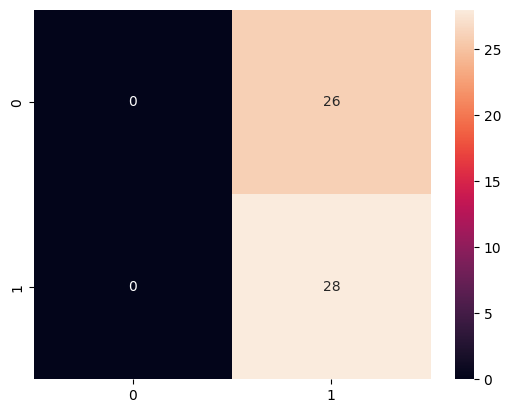

In [27]:
sns.heatmap(cm, annot=True);

In [28]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.52      1.00      0.68        28

    accuracy                           0.52        54
   macro avg       0.26      0.50      0.34        54
weighted avg       0.27      0.52      0.35        54



c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

- Salvar e carregar o modelo treinado 

In [29]:
model_json = network1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
network1_saved = save_model(network1, "weights1.hdf5")

In [31]:
with open('model.json', 'r') as json_file:
    json_savedModel= json_file.read()
json_savedModel    

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": n

In [32]:
network1_loaded = tf.keras.models.model_from_json(json_savedModel)
network1_loaded.load_weights('weights1.hdf5')
network1_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


- Classificação de uma unica imagem

In [34]:
X_test[0], y_test[0]

(array([1., 1., 1., ..., 1., 1., 1.]), 1)

- Para verrificar a imagem precisamos converter o array em matriz e depois voltar a normalização

In [47]:
imagem_teste = X_test[10]
imagem_teste = scaler.inverse_transform(imagem_teste.reshape(1, -1))

In [48]:
imagem_teste

array([[255., 255., 255., ..., 253., 252., 253.]])

In [49]:
PIL_image = PIL.Image.fromarray(imagem_teste.reshape(128, 128))
PIL_image.show()

In [51]:
network1_loaded.predict(imagem_teste)[0][0]

1/1 [==============================] - 0s 165ms/step


1.0

In [52]:
if network1_loaded.predict(imagem_teste)[0][0] > 0.5:
    print("É o Bart")
else:
    print("É o Homer")    

1/1 [==============================] - 0s 164ms/step
É o Bart
